In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import glob

from scipy.fft import fftshift
from scipy.signal import welch, spectrogram

In [ ]:
# Funciones necesarias para mostrar el PSD y Spectrogram, respectivamente

def plot_PSD(signal, fs=1.0, title="", nfft=256, fc=0.0):

    f, Pxx_spec = welch(signal, fs, nperseg=nfft, return_onesided=False, scaling="density")
    Pxx_spec_dB = 10 * np.log10(Pxx_spec)
    f = fftshift(f)
    Pxx_spec_dB = fftshift(Pxx_spec_dB)

    fig, ax = plt.subplots()
    ax.plot((f + fc) / 1e6, Pxx_spec_dB)
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("PSD [dB/Hz]")
    ax.set_title(title)
    ax.grid(True)

    return fig


def plot_spectrogram(
    signal_to_plot,
    fs=1.0,
    nfft=512,
    noverlap=0,
    return_onesided=False,
    title="",
    fc=0.0,
):
    fig, ax1 = plt.subplots()

    f, t, Sxx = spectrogram(
        signal_to_plot,
        fs,
        nperseg=nfft,
        noverlap=noverlap,
        return_onesided=return_onesided,
    )
    Sxx_dB = 10 * np.log10(Sxx)

    im = ax1.pcolormesh(
        ((fftshift(f) + fc) / (1e6)),
        (t * 1e3),
        fftshift(Sxx_dB.T, axes=1),
        shading="gouraud",
    )
    ax1.set(
        xlabel="Frequency [MHz]",
        ylabel="Time [ms]",
        title="Power spectral density [dB/Hz]",
        xlim=((fc - fs / 2) / 1e6, (fc + fs / 2) / 1e6),
    )
    ax1.grid(True)
    fig.colorbar(im, ax=ax1)

    plt.title(title)

    return fig

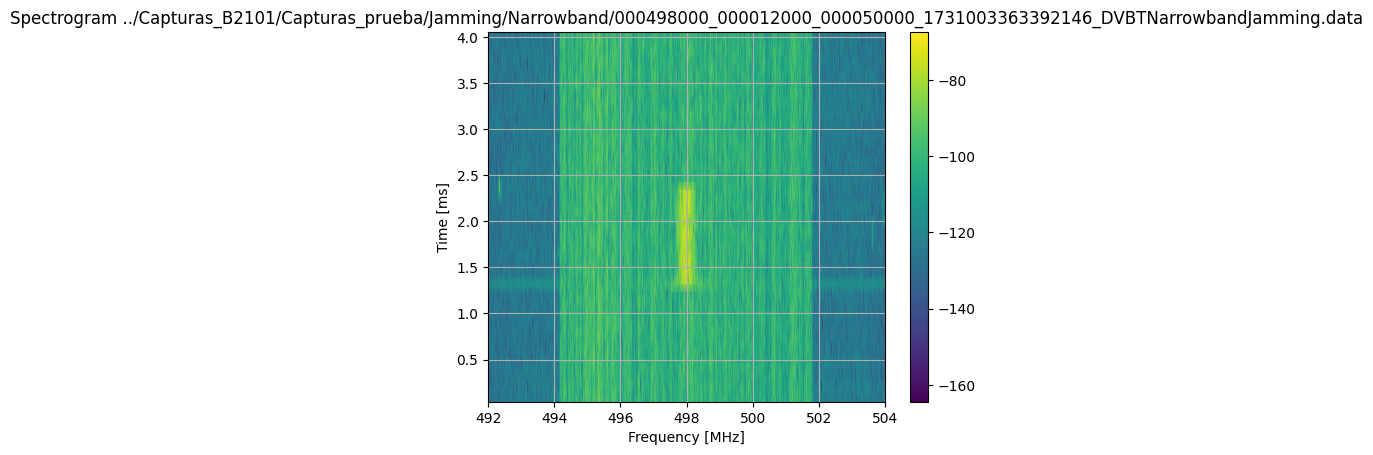

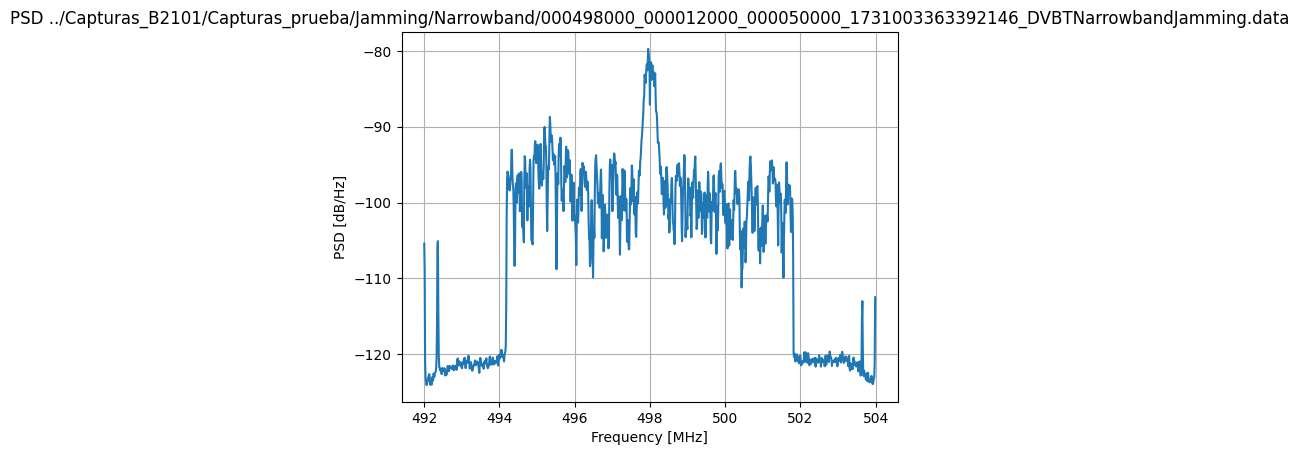

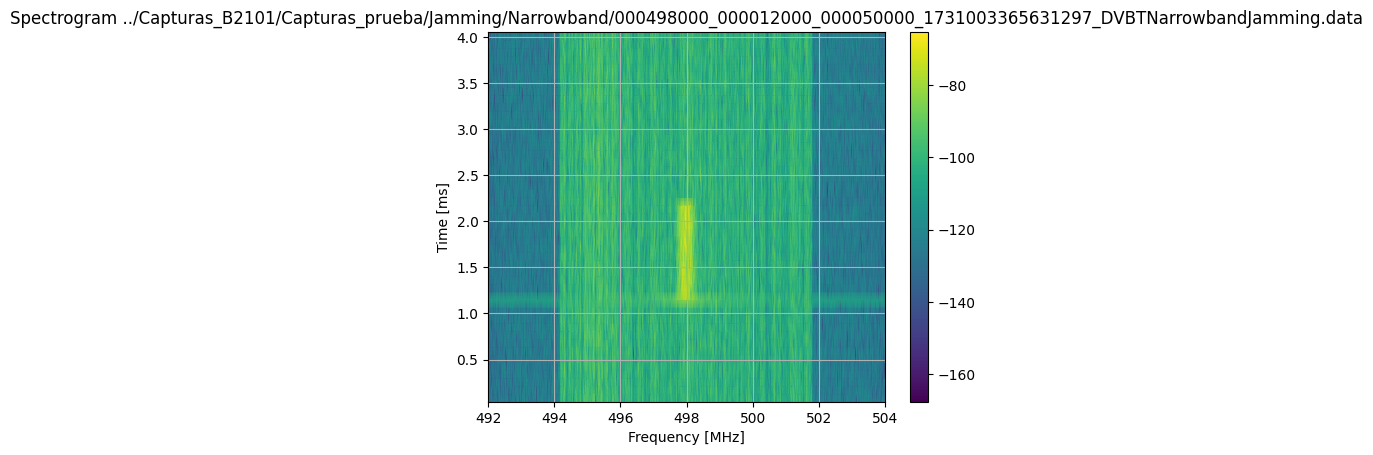

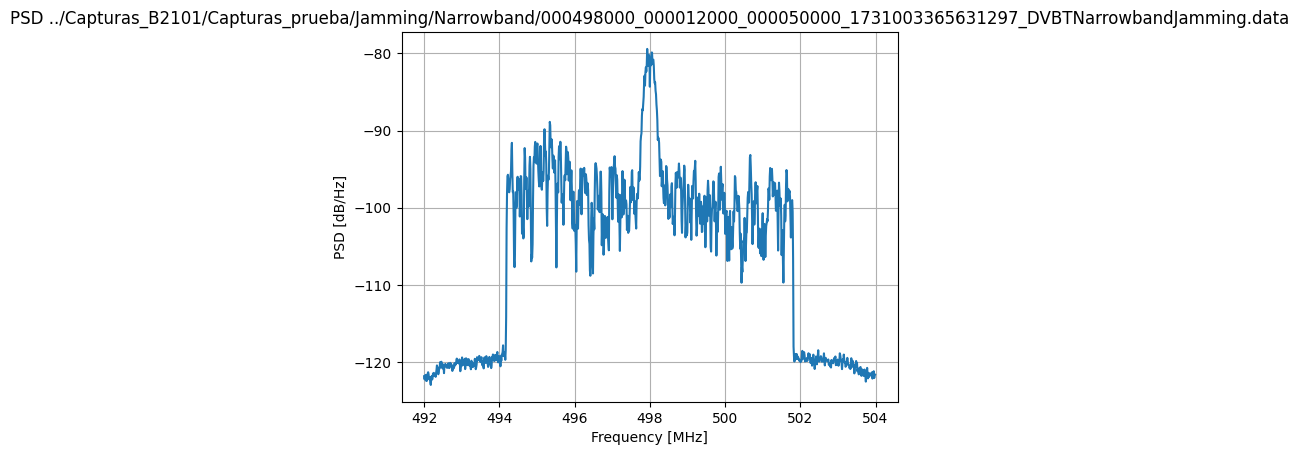

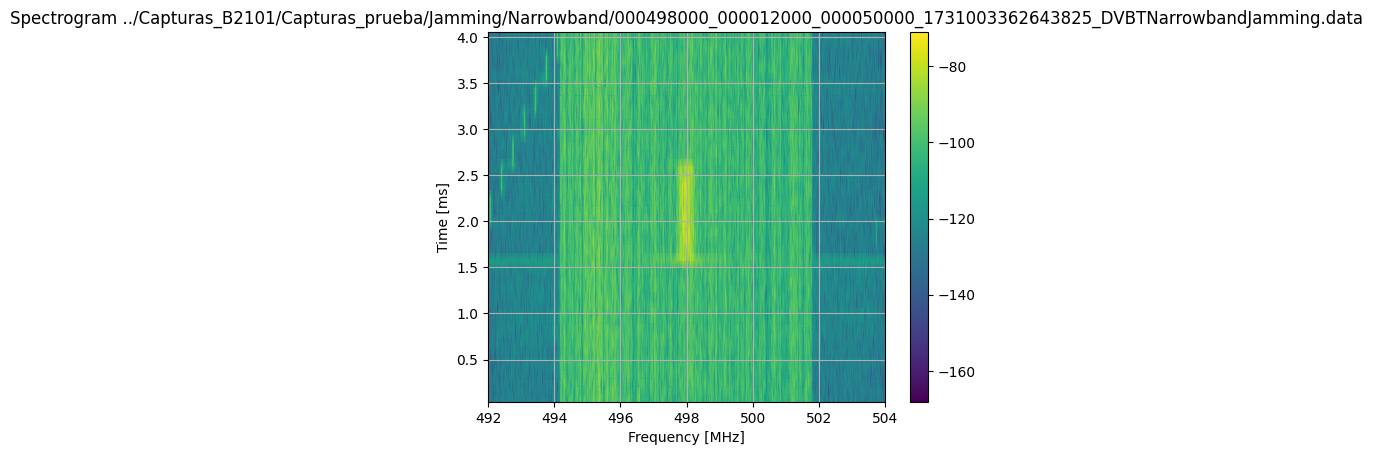

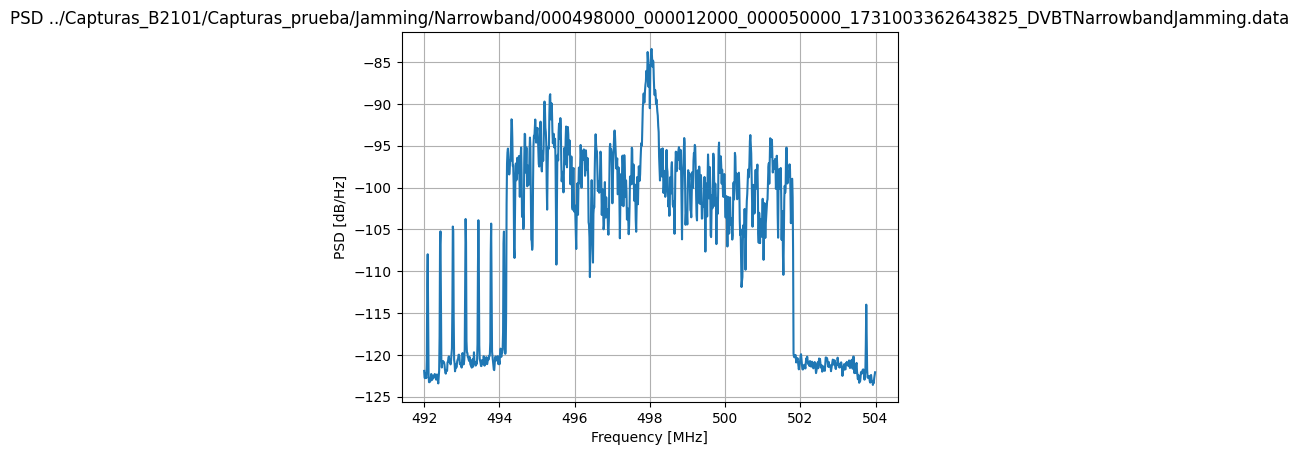

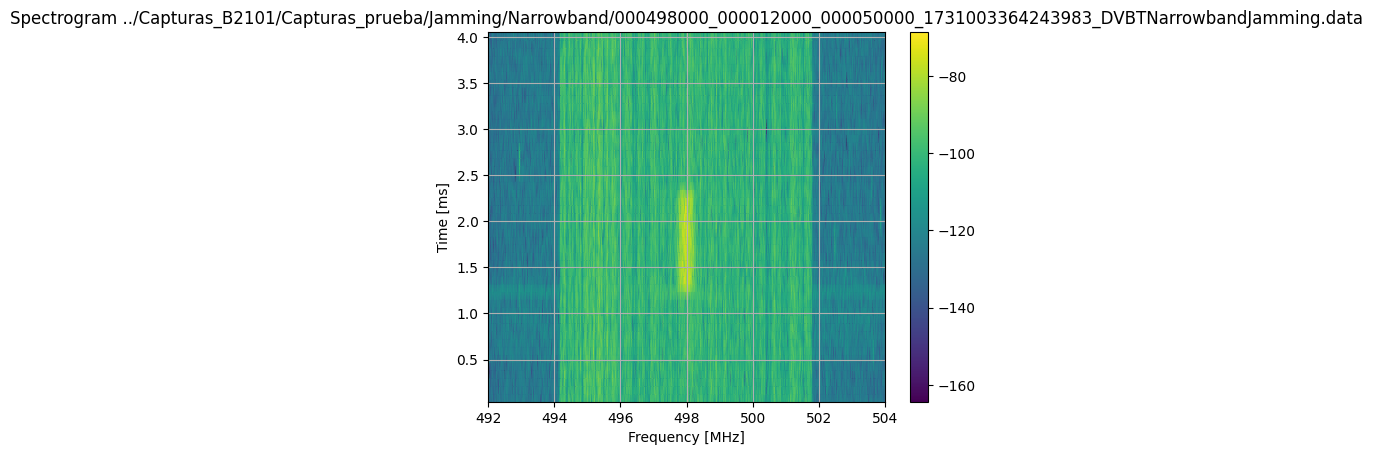

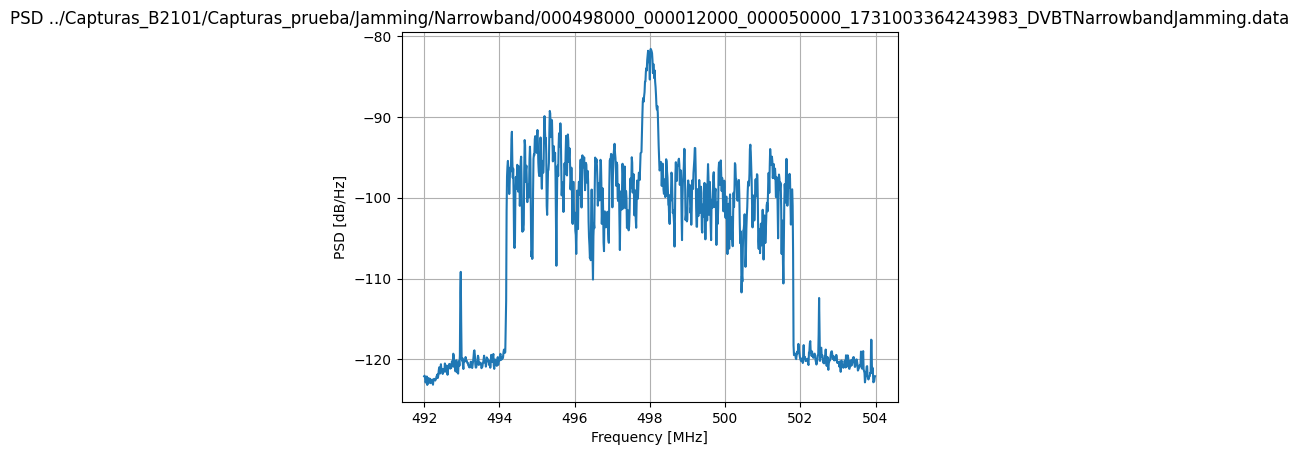

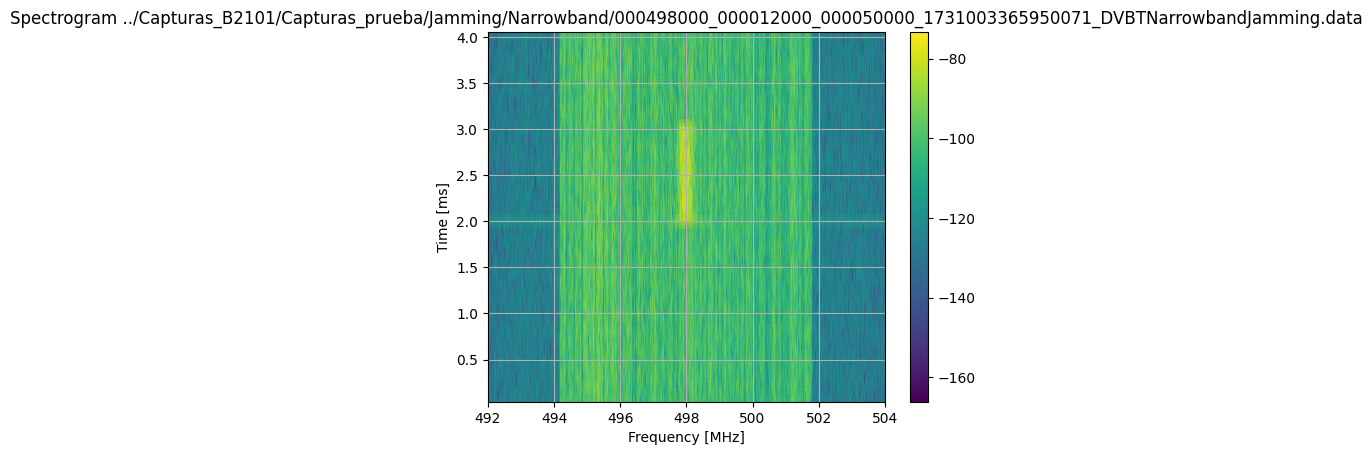

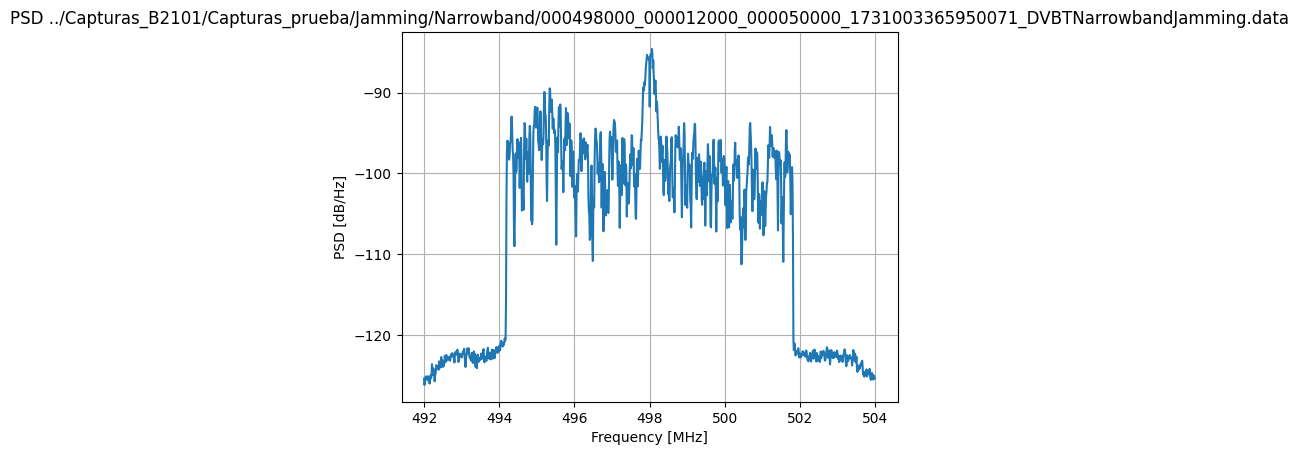

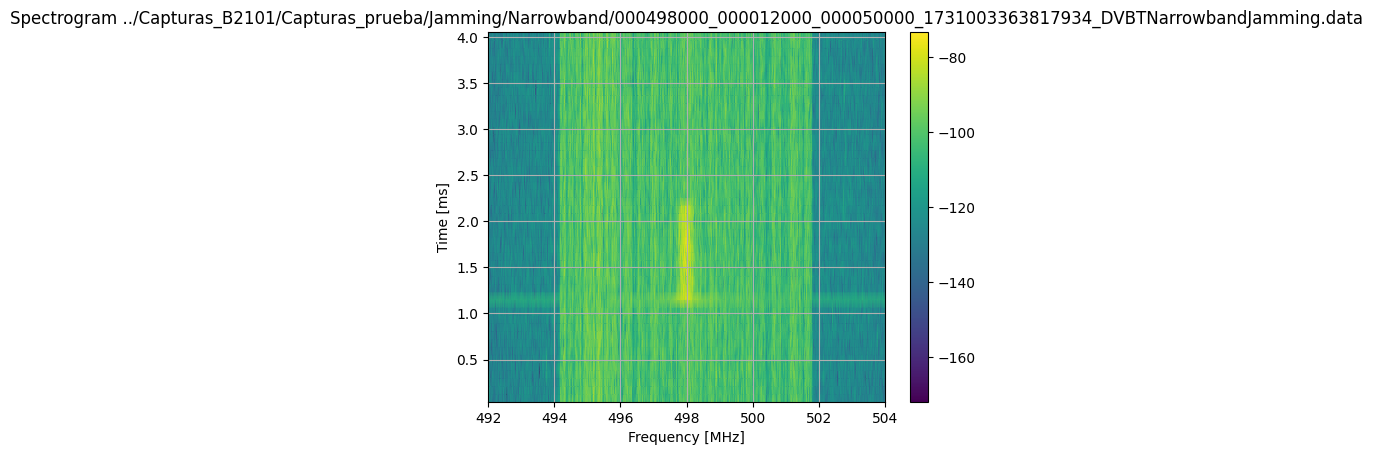

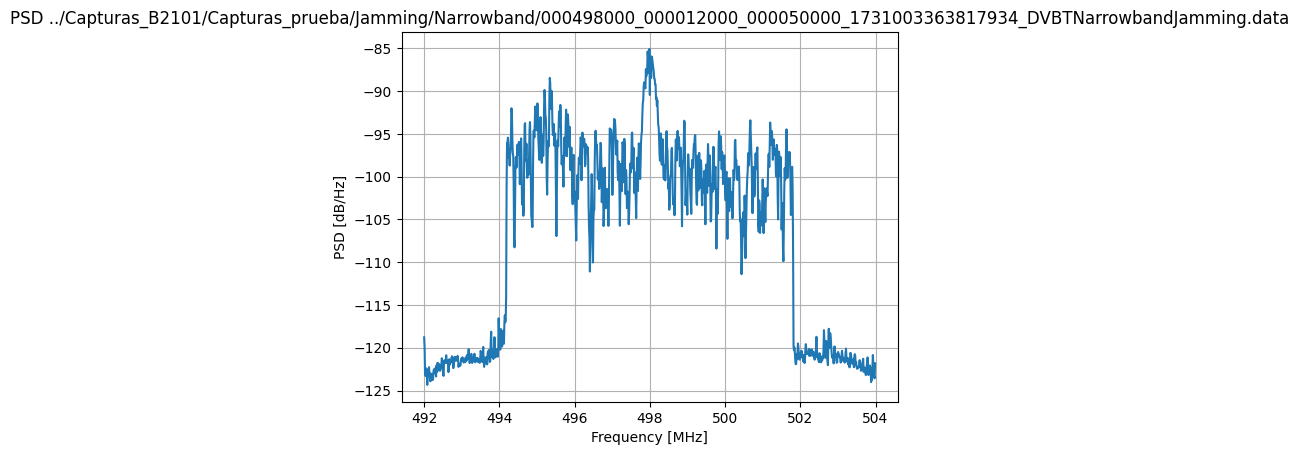

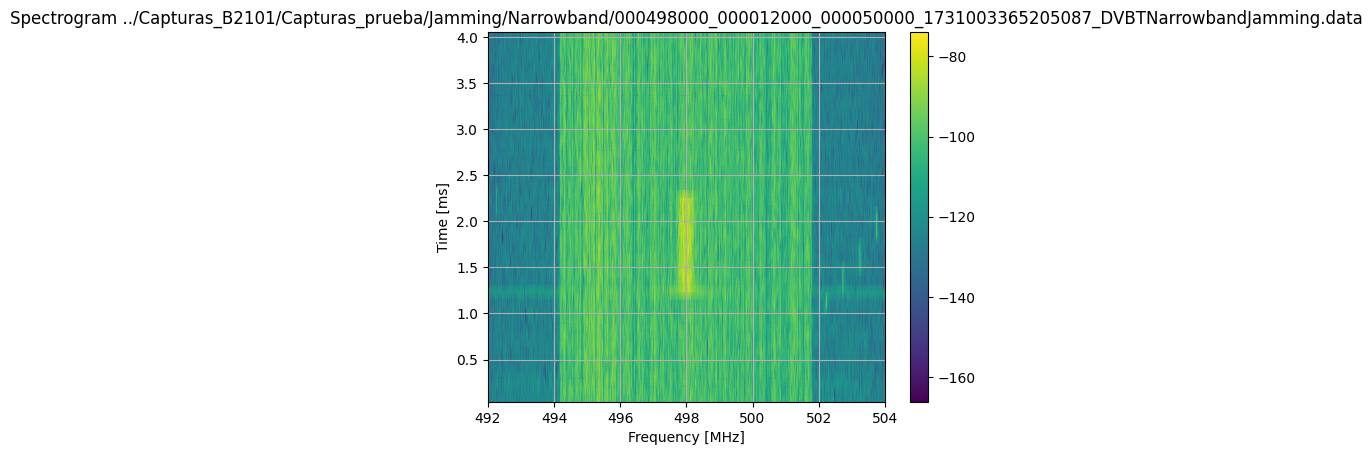

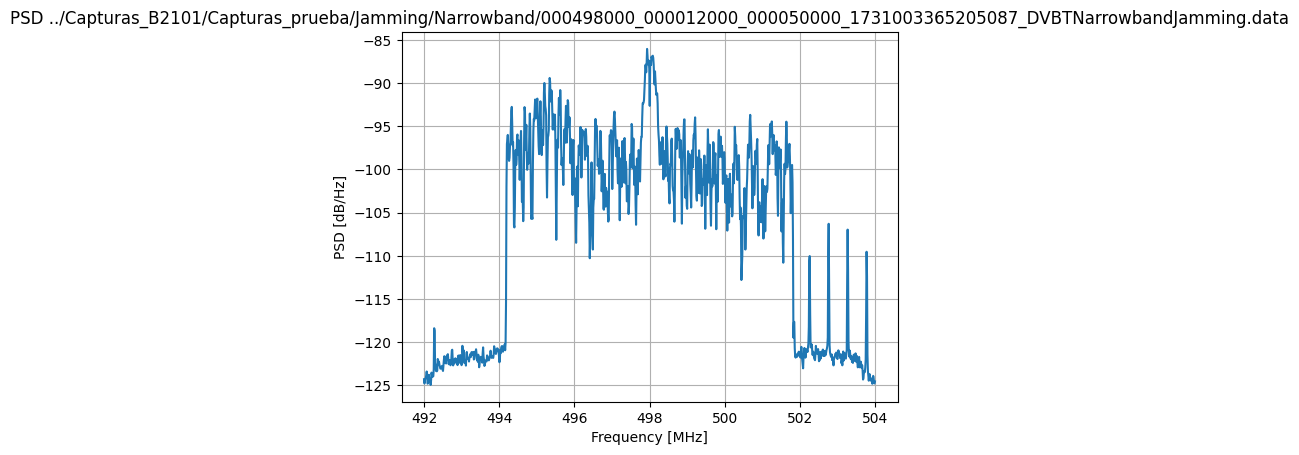

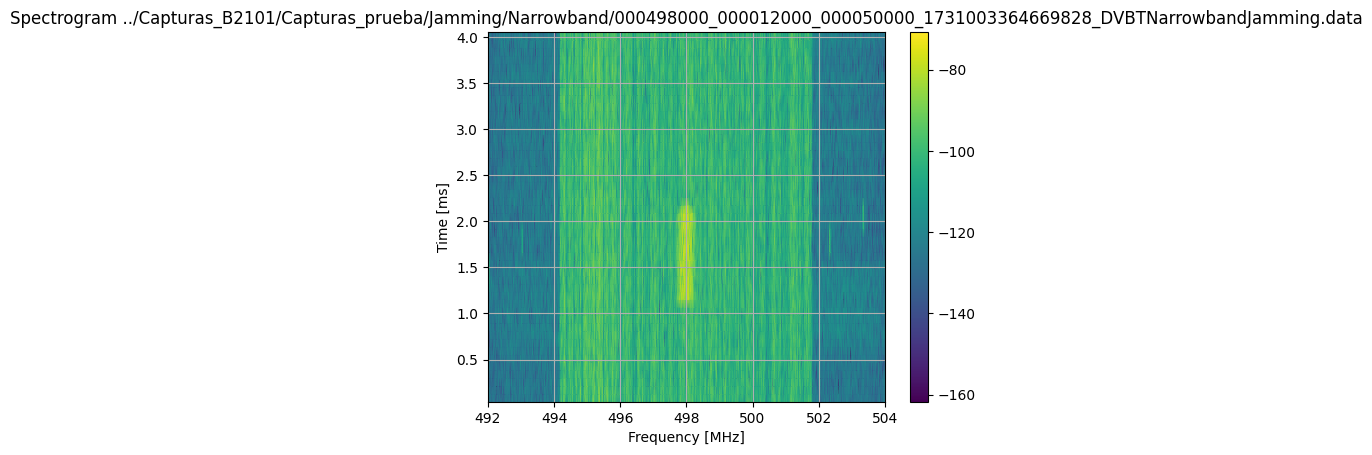

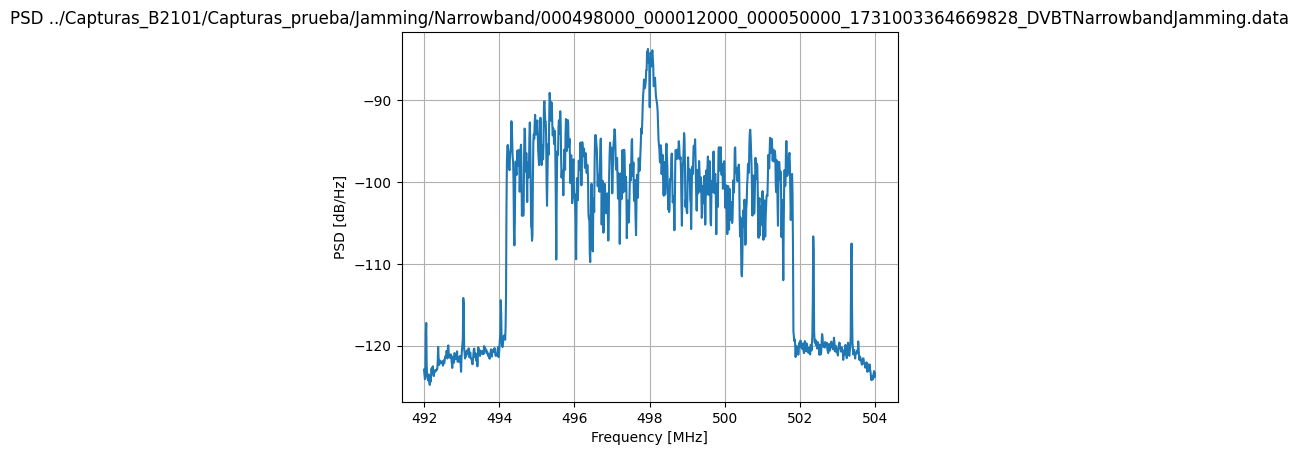

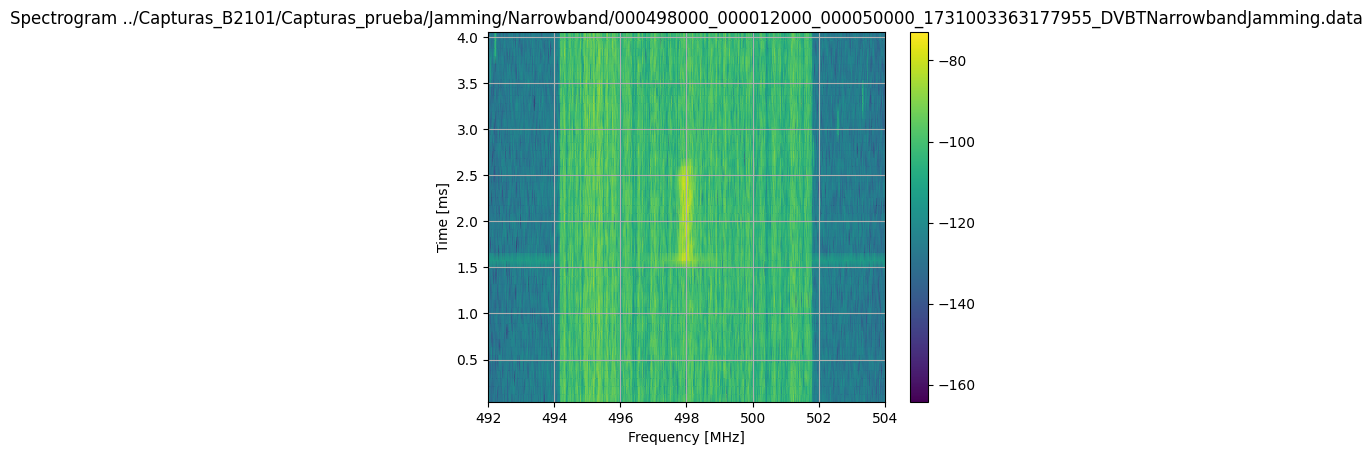

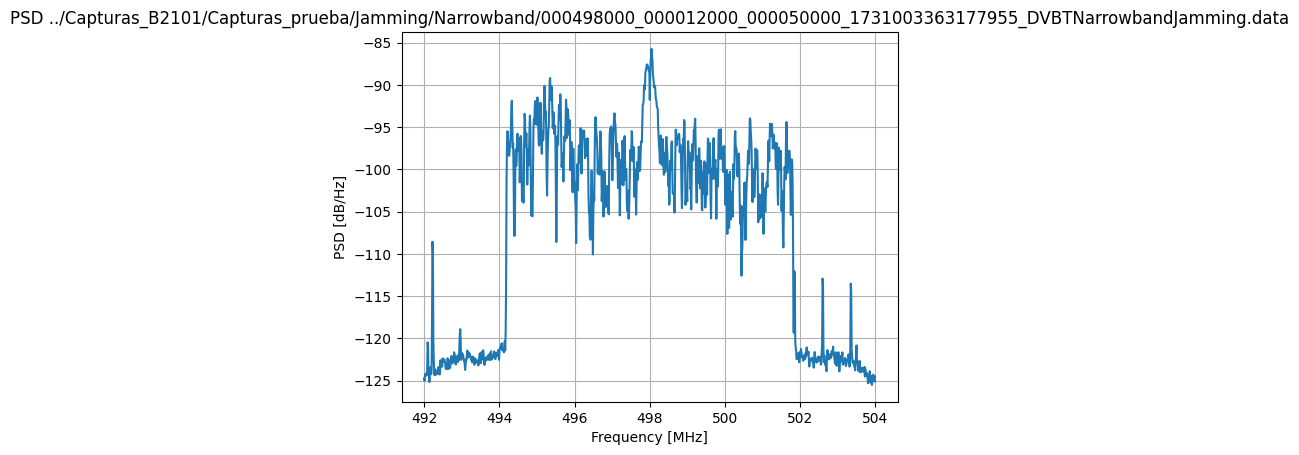

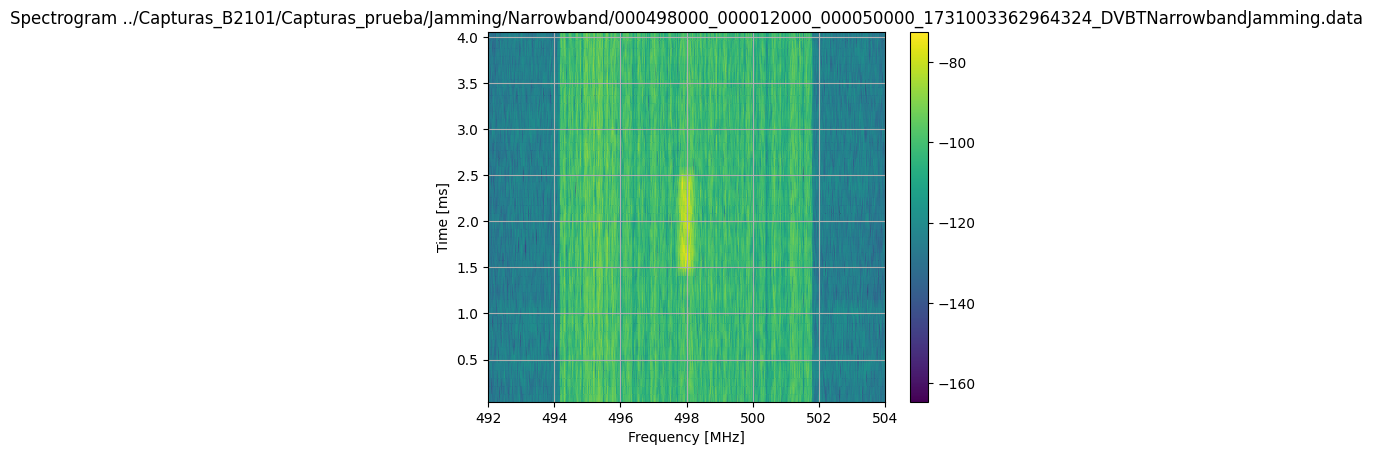

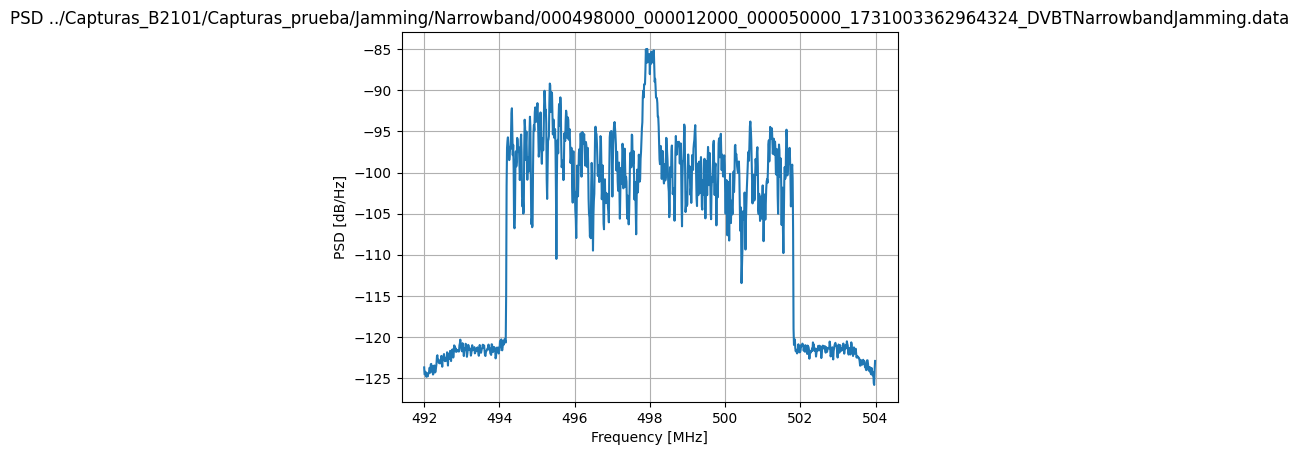

In [ ]:
fs = 12e6
fc = 498e6
nfft = 1024

# Directorio con los archivos _DVBTNarrowbandJamming.data
input_directory = "../Capturas_B2101/Capturas_prueba/Jamming/Narrowband"

# Obtiene la lista de todos los archivos .data en el directorio
file_list = glob.glob(os.path.join(input_directory, "*.data"))

# Visualizar espectrograma de archivos aleatorios
random_files = random.sample(file_list, min(10, len(file_list)))  # Selecciona hasta 10 archivos aleatorios

for file_path in random_files:
    with open(file_path, "rb") as file:
        signal = np.frombuffer(file.read(), dtype=np.complex64)
    
    # Espectrograma de la señal
    fig = plot_spectrogram(signal, fs, nfft, title=f"Spectrogram {file_path}", fc=fc)

    # PSD de la señal
    fig = plot_PSD(signal, fs, title=f"PSD {file_path}", nfft=nfft, fc=fc)

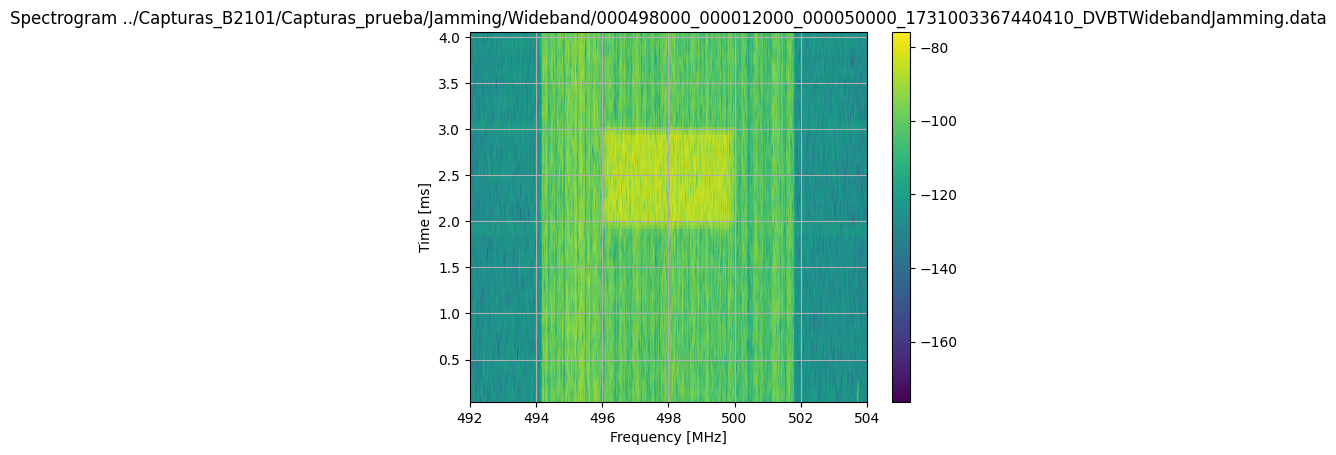

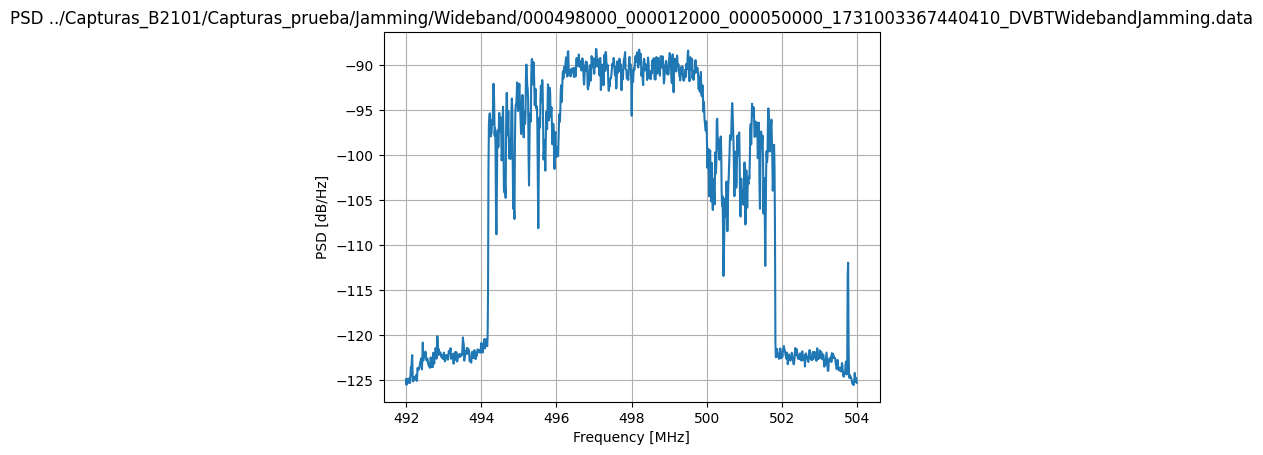

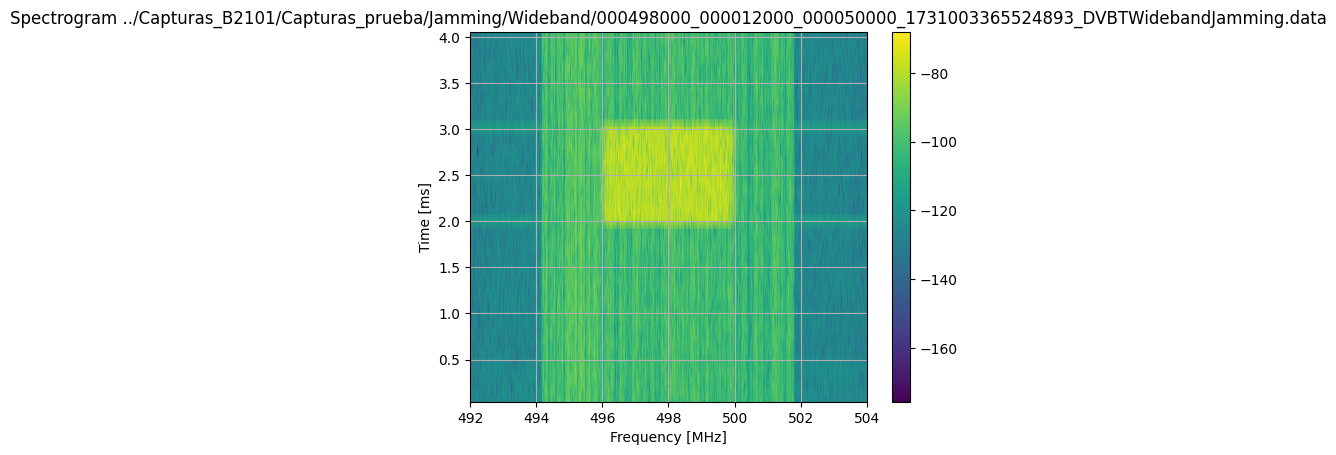

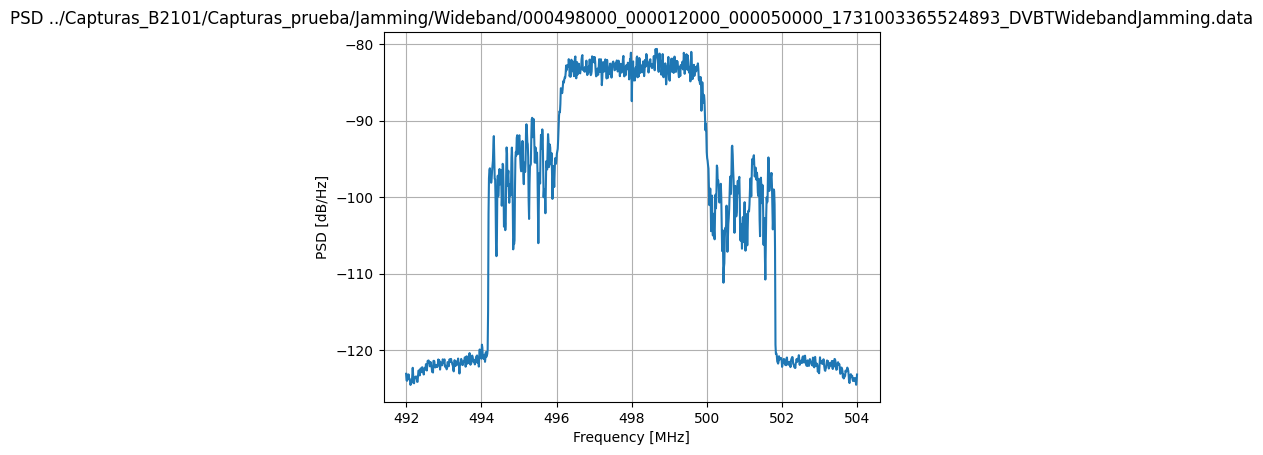

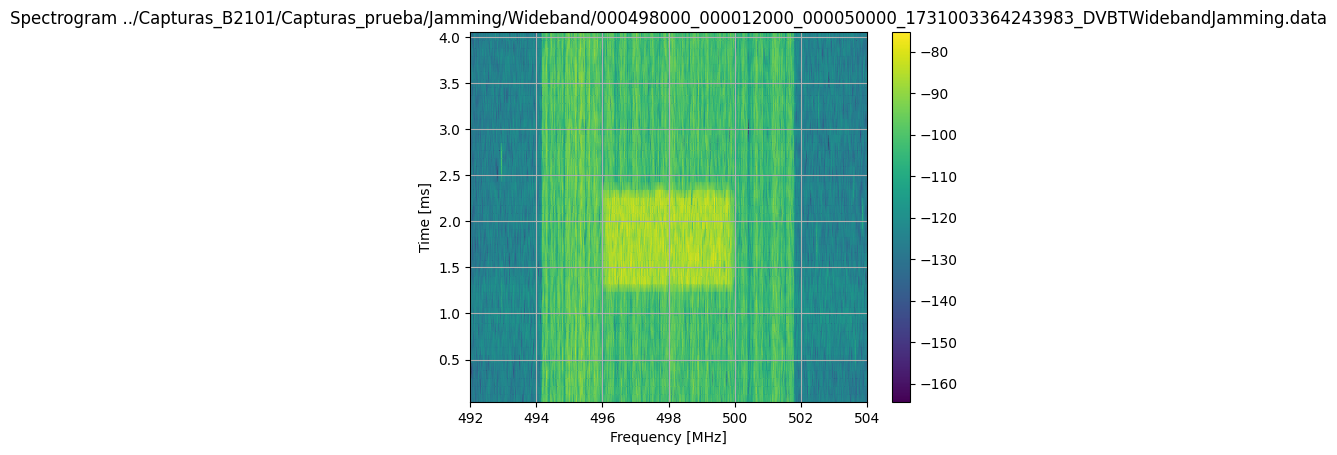

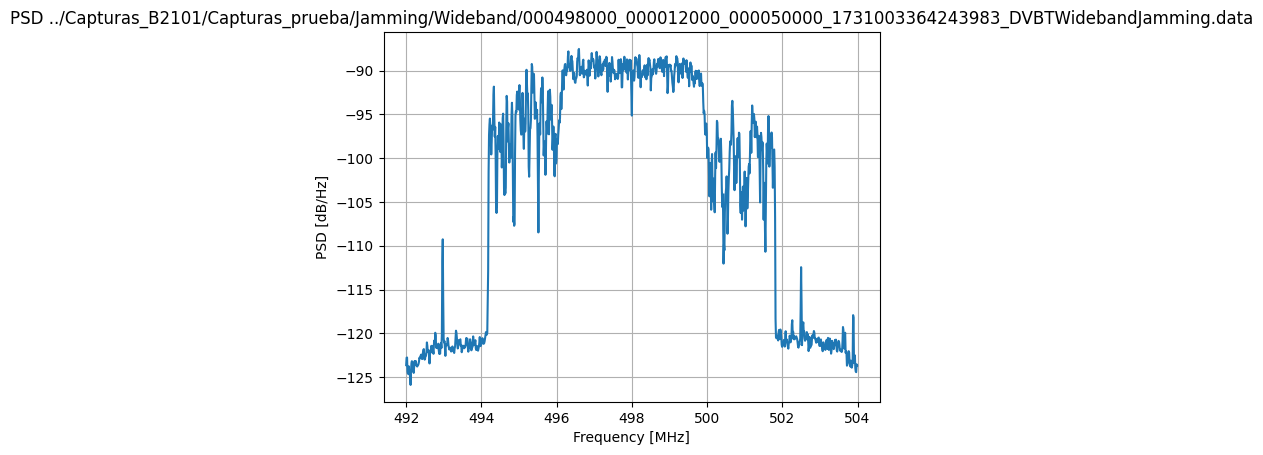

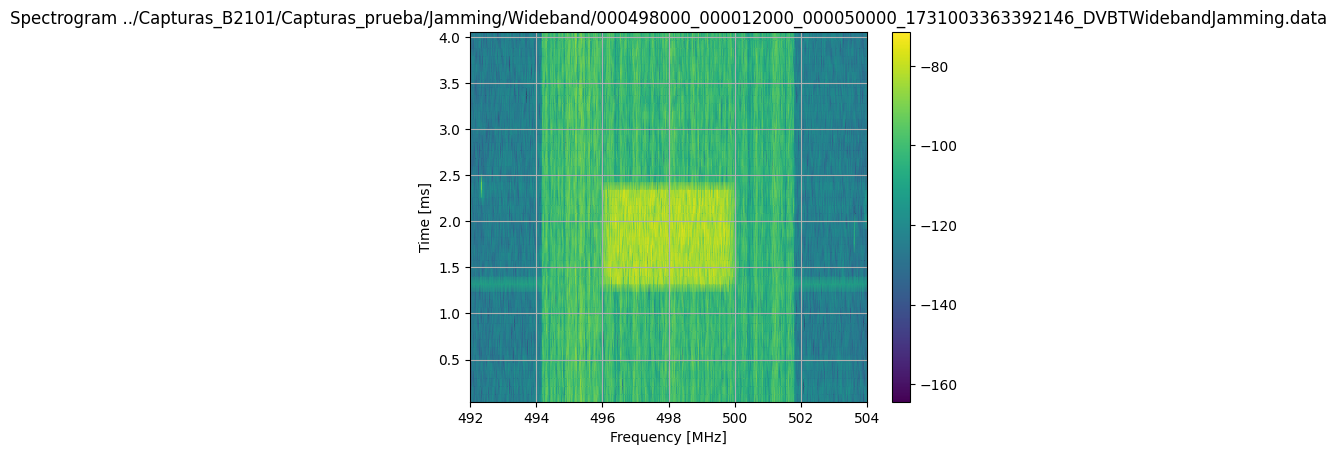

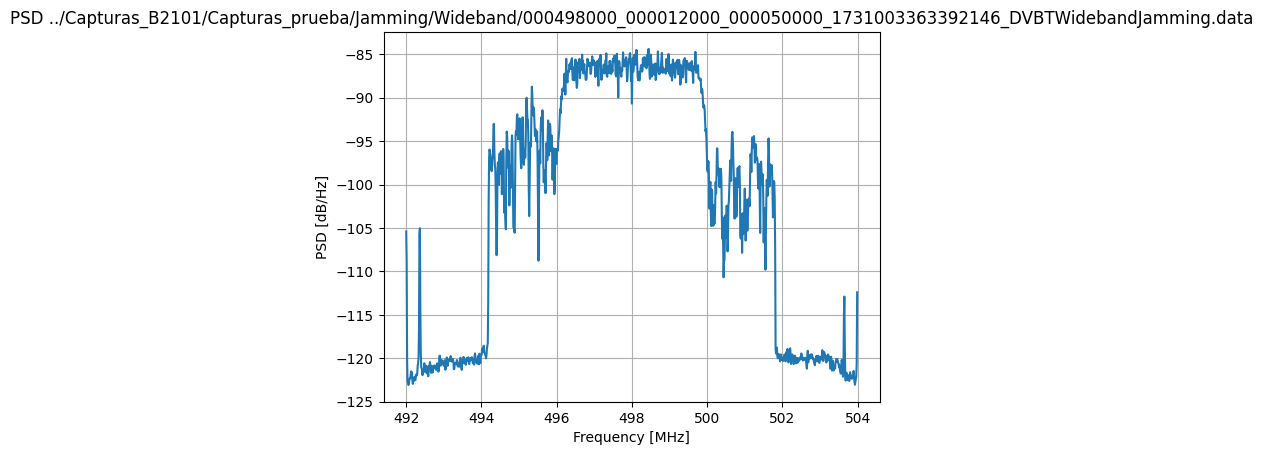

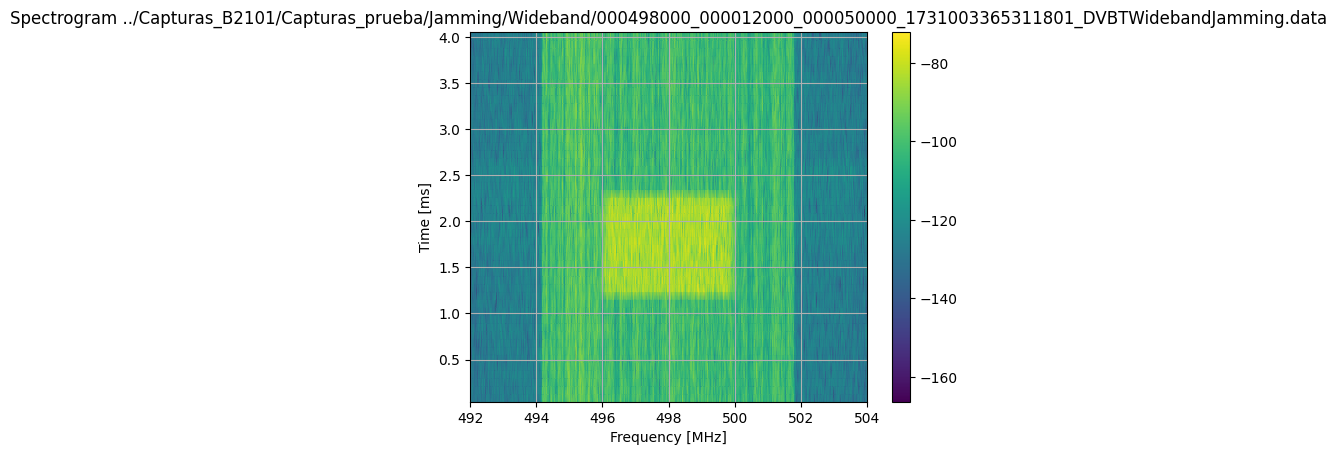

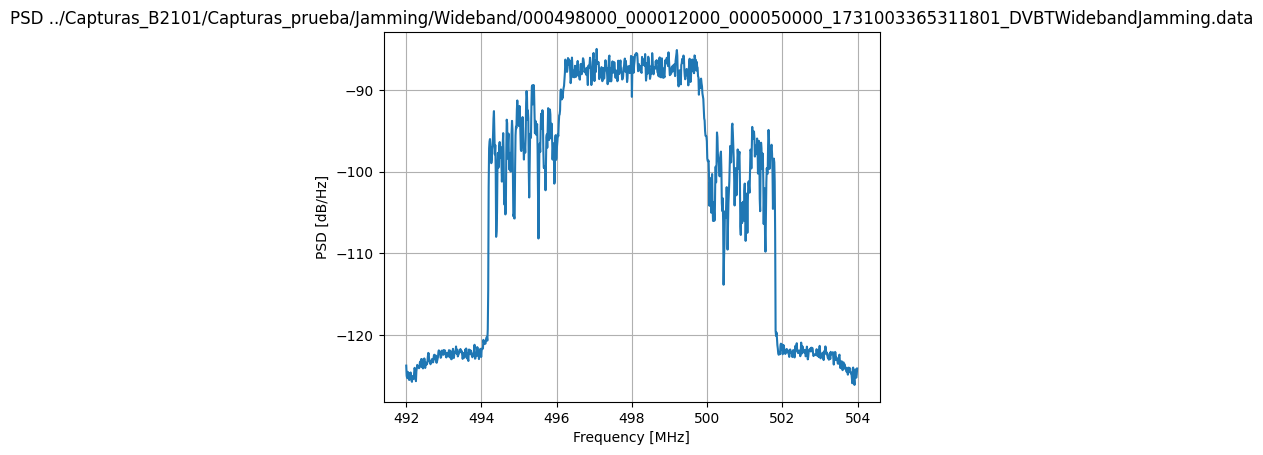

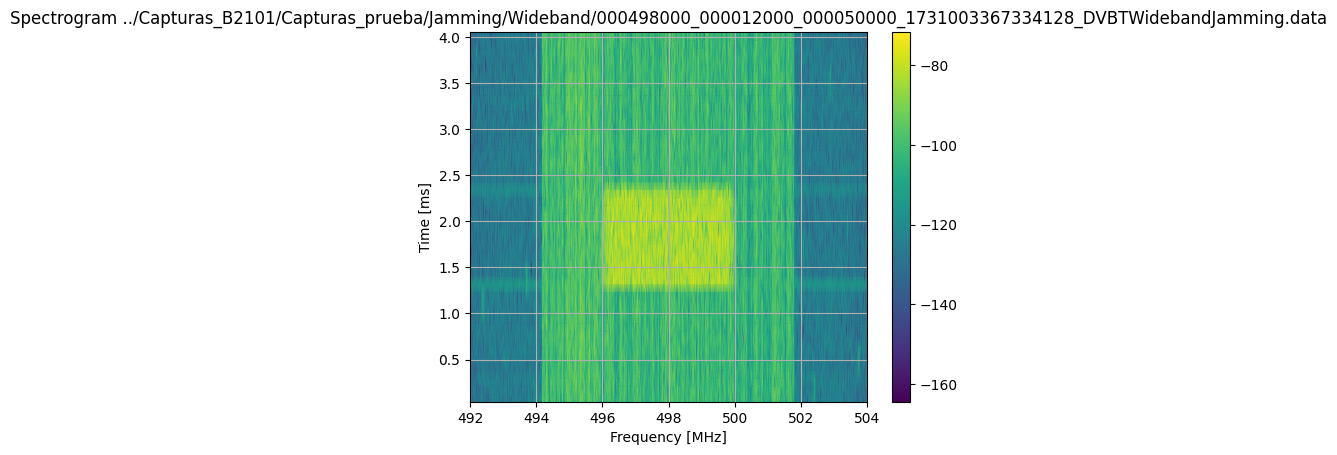

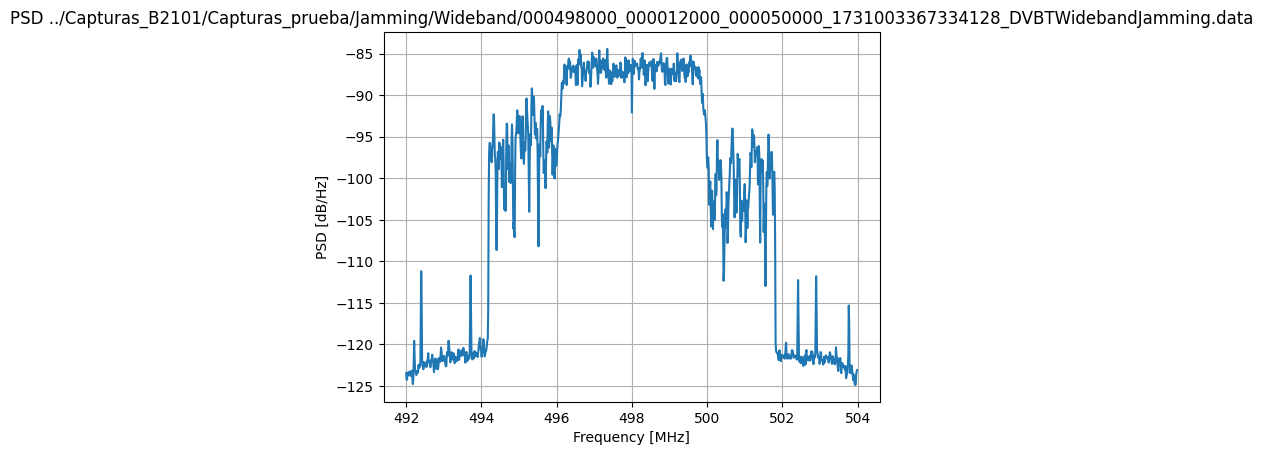

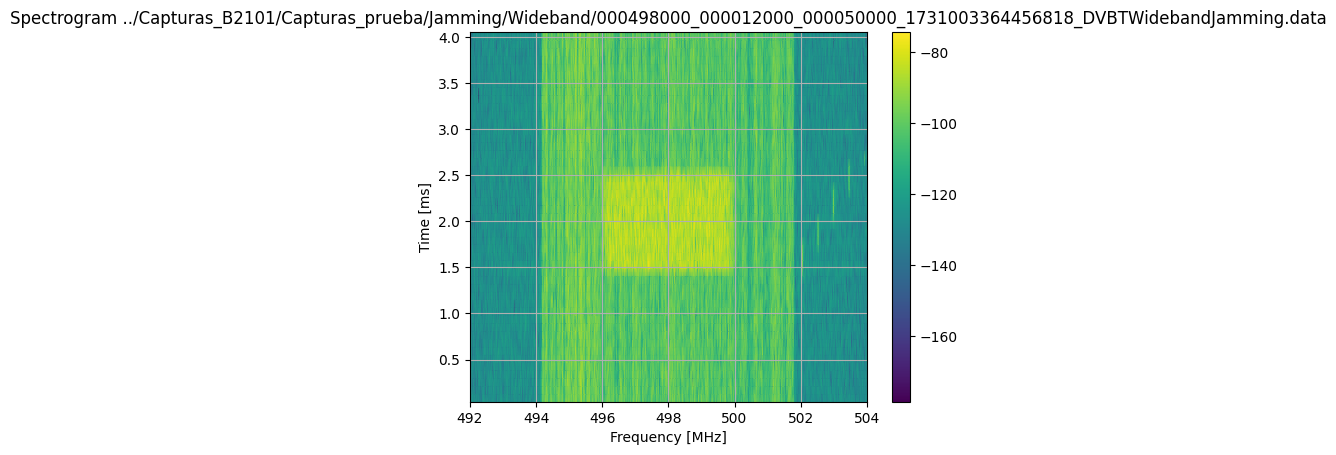

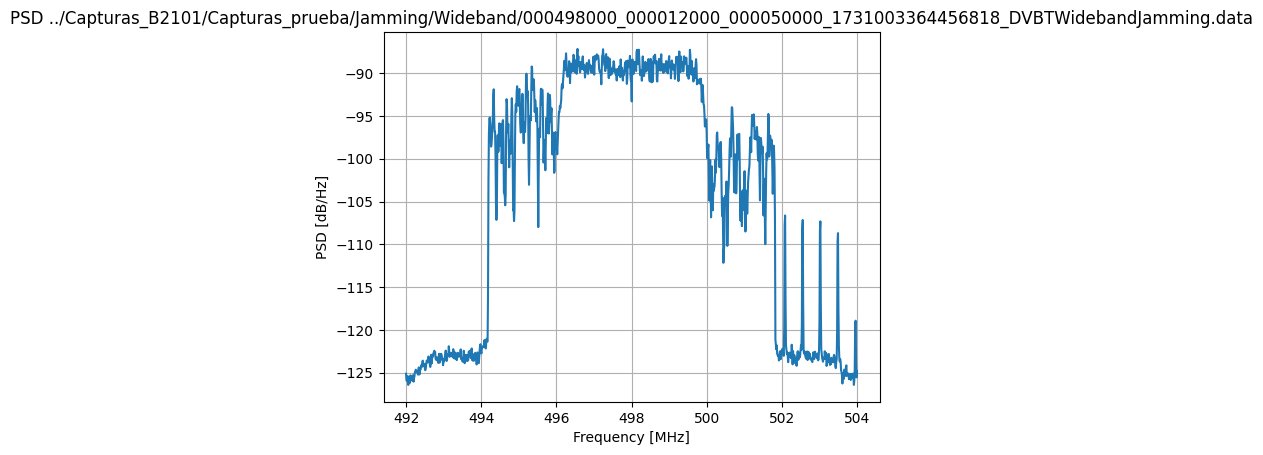

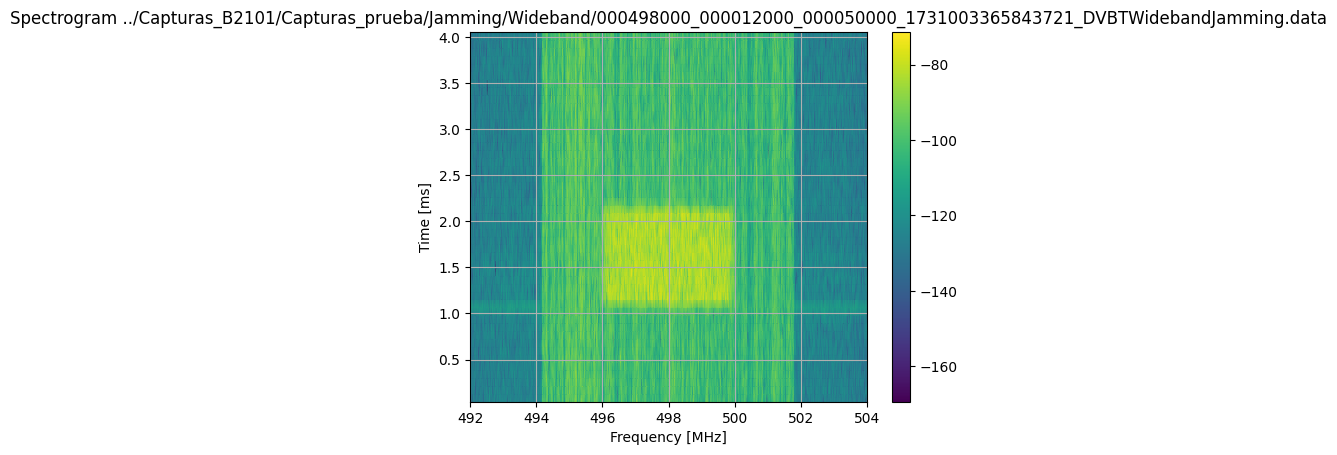

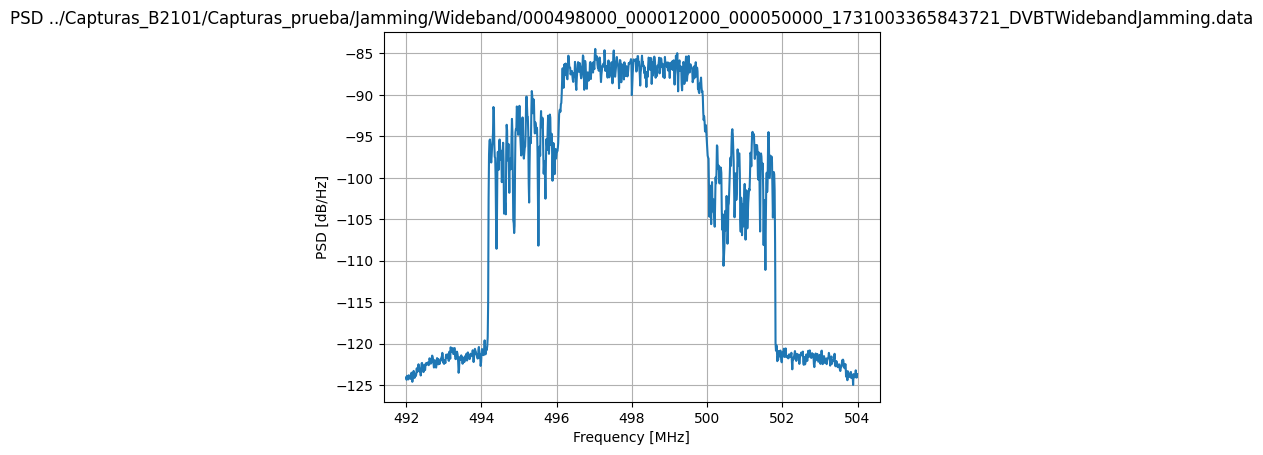

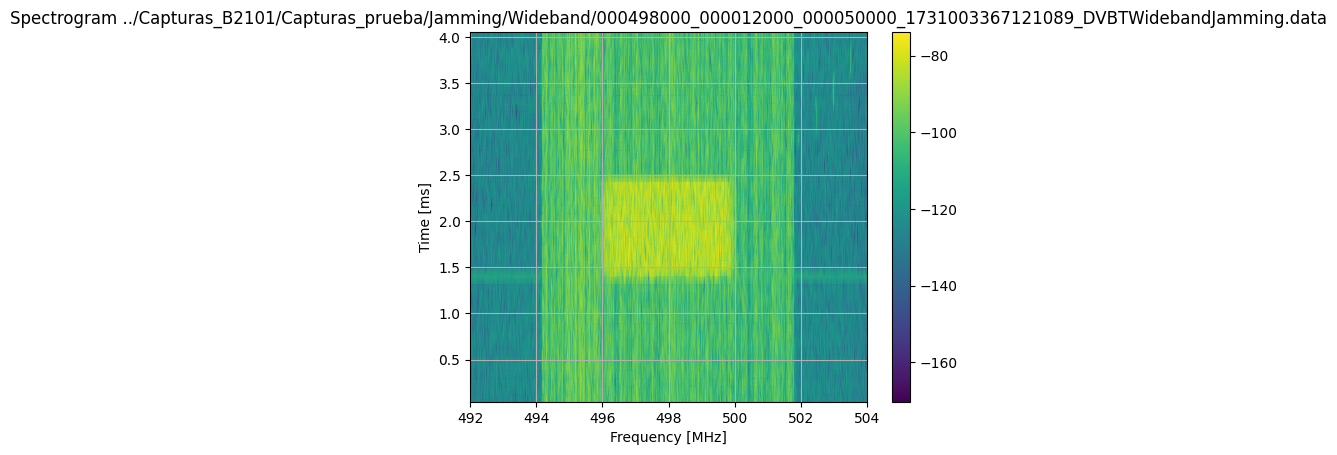

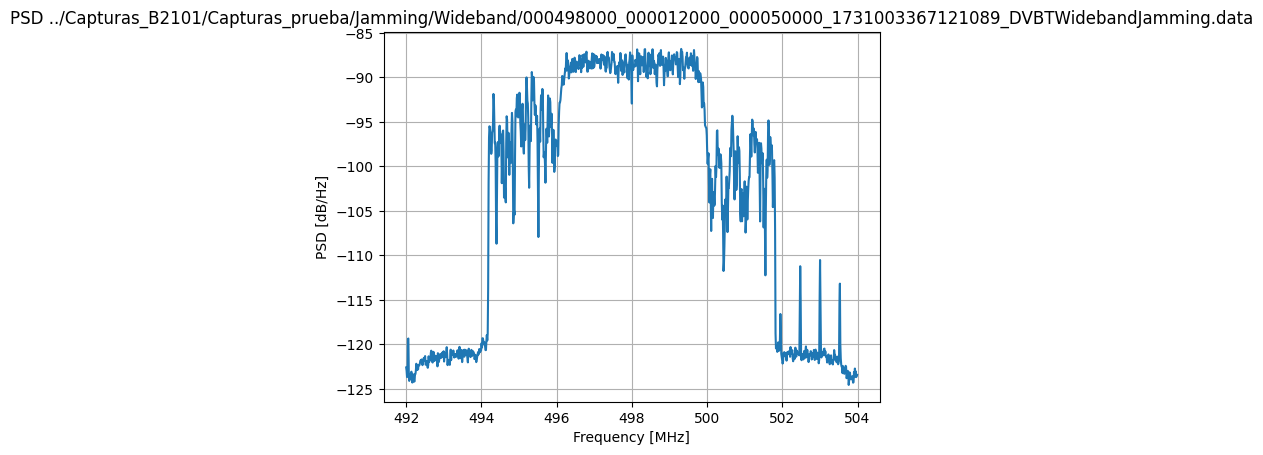

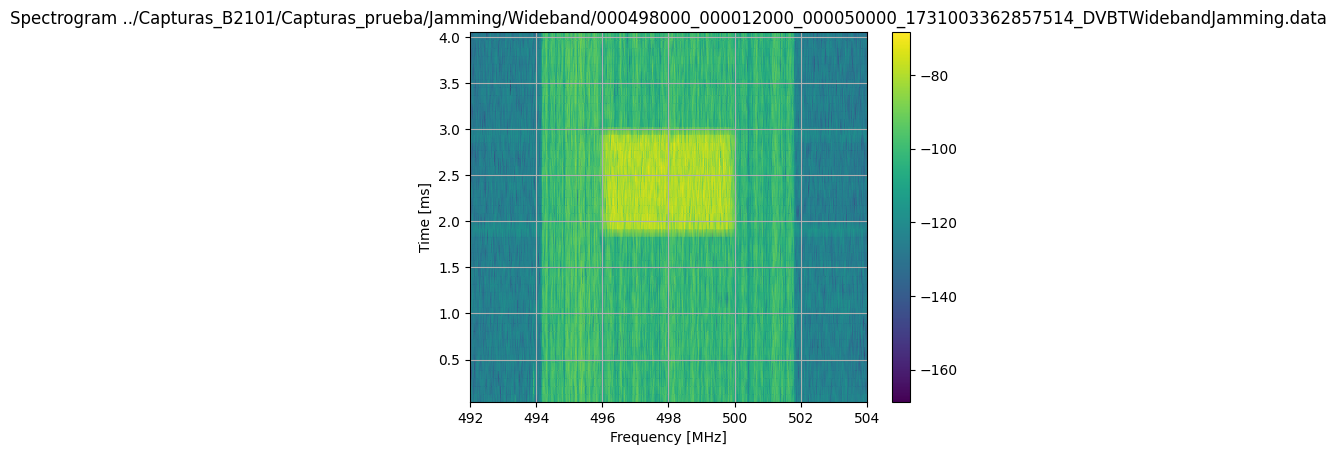

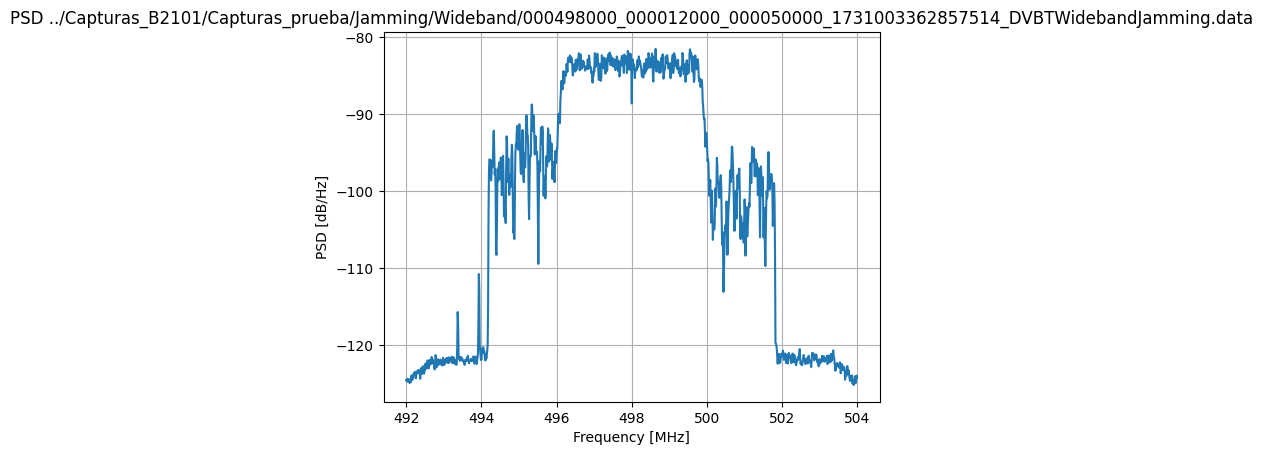

In [ ]:
fs = 12e6
fc = 498e6
nfft = 1024

# Directorio con los archivos  _DVBTWideJamming.data
input_directory = "../Capturas_B2101/Capturas_prueba/Jamming/Wideband"

# Obtiene la lista de todos los archivos .data en el directorio
file_list = glob.glob(os.path.join(input_directory, "*.data"))

# Visualizar espectrograma de archivos aleatorios
random_files = random.sample(file_list, min(10, len(file_list)))  # Selecciona hasta 10 archivos aleatorios

for file_path in random_files:
    with open(file_path, "rb") as file:
        signal = np.frombuffer(file.read(), dtype=np.complex64)
    
    # Espectrograma de la señal
    fig = plot_spectrogram(signal, fs, nfft, title=f"Spectrogram {file_path}", fc=fc)

    # PSD de la señal
    fig = plot_PSD(signal, fs, title=f"PSD {file_path}", nfft=nfft, fc=fc)